In [10]:
import pandas as pd

In [11]:
chosen_ramris:str = 'R:\\AIMIRA\\AIMIRA_Scores\\SPSS data\\TE_scores_MRI_serieel_nieuw.csv'
df = pd.read_csv(chosen_ramris, sep=',')

In [12]:
df.head(5)

,Unnamed: 0,TENR,hoeveelste_MRI,SCANdatum,MTDERO1.1,MTDERO1.2,MTDERO2.1,MTDERO2.2,MTDERO3.1,MTDERO3.2,...,WRTSYI.1,WRTSYI.2,WRTSY1.1,WRTSY1.2,WRTSY2.1,WRTSY2.2,WRTSY3.1,WRTSY3.2,WRTSY4.1,WRTSY4.2
0,1,1,1,2015-03-19,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,2,1,2,2015-08-17,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
2,3,1,3,2016-04-12,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,4,2017-04-25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2,1,2015-03-31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
WRs = [column for column in df if column[:2]=='MT']
WRs.append('TENR')
dfwr = df[WRs]  # df of wrist + csaid

In [14]:
dfwr.head(5)

,MTDERO1.1,MTDERO1.2,MTDERO2.1,MTDERO2.2,MTDERO3.1,MTDERO3.2,MTDERO4.1,MTDERO4.2,MTDERO5.1,MTDERO5.2,...,MTFTSY1.2,MTFTSY2.1,MTFTSY2.2,MTFTSY3.1,MTFTSY3.2,MTFTSY4.1,MTFTSY4.2,MTFTSY5.1,MTFTSY5.2,TENR
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [15]:
# 需要计算所有Wrist的TSY, SYN, BME. 合并.1和.2
TSY = [column for column in dfwr if (column[3:6]=='TSY' or column=='TENR')]
SYN = [column for column in dfwr if (column[2:5]=='SYN' or column=='TENR')]
BME = [column for column in dfwr if (column[3:6]=='BME' or column=='TENR')]
dfwr_tsy = df[TSY]
dfwr_syn = df[SYN]
dfwr_bme = df[BME]

In [16]:
dfwr_syn.head(5)

,MTSYN1.1,MTSYN1.2,MTSYN2.1,MTSYN2.2,MTSYN3.1,MTSYN3.2,MTSYN4.1,MTSYN4.2,MTSYN5.1,MTSYN5.2,TENR
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [17]:
# def splitreader(df:pd.DataFrame):
#     read1 = [column for column in df if (column[-2:]=='.1' or column=='CSANUMM')]
#     read2 = [column for column in df if (column[-2:]=='.2' or column=='CSANUMM')]
#     return df[read1], df[read2]

def meanreader(df:pd.DataFrame):
    meancolumn = [column[:-2] for column in df if column[-2:]=='.1']
    for col in meancolumn:
        col1, col2 = col+'.1', col+'.2'
        df.loc[:, col1] = pd.to_numeric(df[col1], errors='coerce')
        df.loc[df[col1]>10, col1] = 0
        df.loc[:, col2] = pd.to_numeric(df[col2], errors='coerce')
        df.loc[df[col2]>10, col2] = 0
        df.loc[:, col] = df[[col1, col2]].mean(axis=1, skipna=True)
    leftcolumn = ['TENR']
    leftcolumn.extend(meancolumn)
    return df[leftcolumn]

In [18]:
# tsy1, tsy2 = splitreader(dfwr_tsy)
# syn1, syn2 = splitreader(dfwr_syn)
# bme1, bme2 = splitreader(dfwr_bme)
meantsy = meanreader(dfwr_tsy.copy())
meansyn = meanreader(dfwr_syn.copy())
meanbme = meanreader(dfwr_bme.copy())
# print(meantsy.head())
# print(meansyn.head())
# print(meanbme.head())

In [19]:
def sumreader(df:pd.DataFrame) ->pd.DataFrame:
    scorecolumn = [column for column in df if column!='TENR']
    df['sums'] = df[scorecolumn].sum(axis=1, skipna=True)
    return df[['TENR', 'sums']]

In [20]:
sumtsy:pd.DataFrame = sumreader(meantsy)  # CSANUMM, sumtsy
sumsyn:pd.DataFrame = sumreader(meansyn)
sumbme:pd.DataFrame = sumreader(meanbme)

In [21]:
tsycount = sumtsy['sums'].value_counts()
syncount = sumsyn['sums'].value_counts()
bmecount = sumbme['sums'].value_counts()

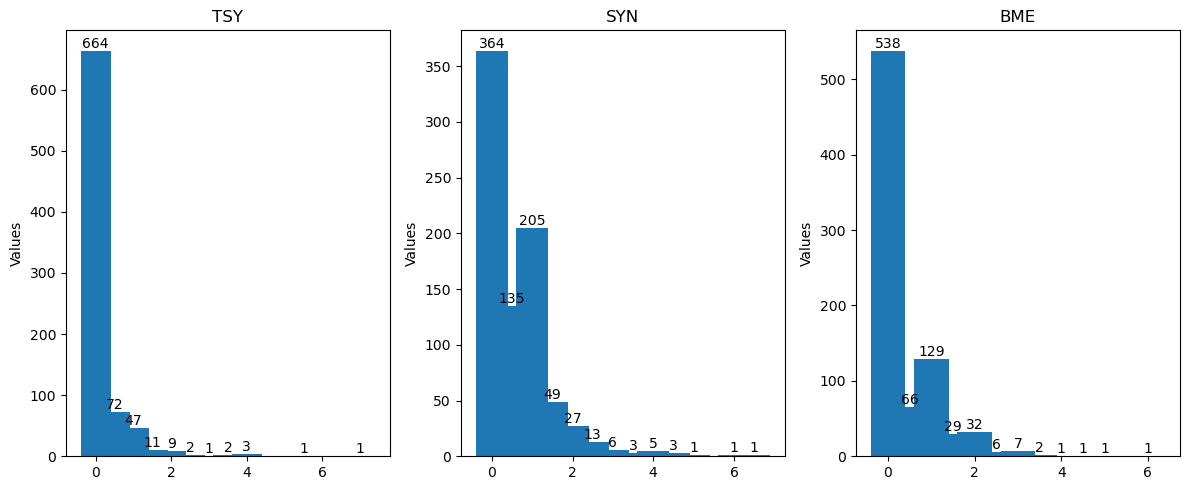

In [22]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(12, 5))
bars1 = axs[0].bar(tsycount.index, tsycount.values)
axs[0].set_title('TSY')
axs[0].set_ylabel('Values')
# 在第一个子图上显示每个柱的值
for bar in bars1:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

bars2 = axs[1].bar(syncount.index, syncount.values)
axs[1].set_title('SYN')
axs[1].set_ylabel('Values')
# 在第二个子图上显示每个柱的值
for bar in bars2:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

bars3 = axs[2].bar(bmecount.index, bmecount.values)
axs[2].set_title('BME')
axs[2].set_ylabel('Values')
# 在第三个子图上显示每个柱的值
for bar in bars3:
    yval = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')


plt.tight_layout()
plt.show()